# DHTML

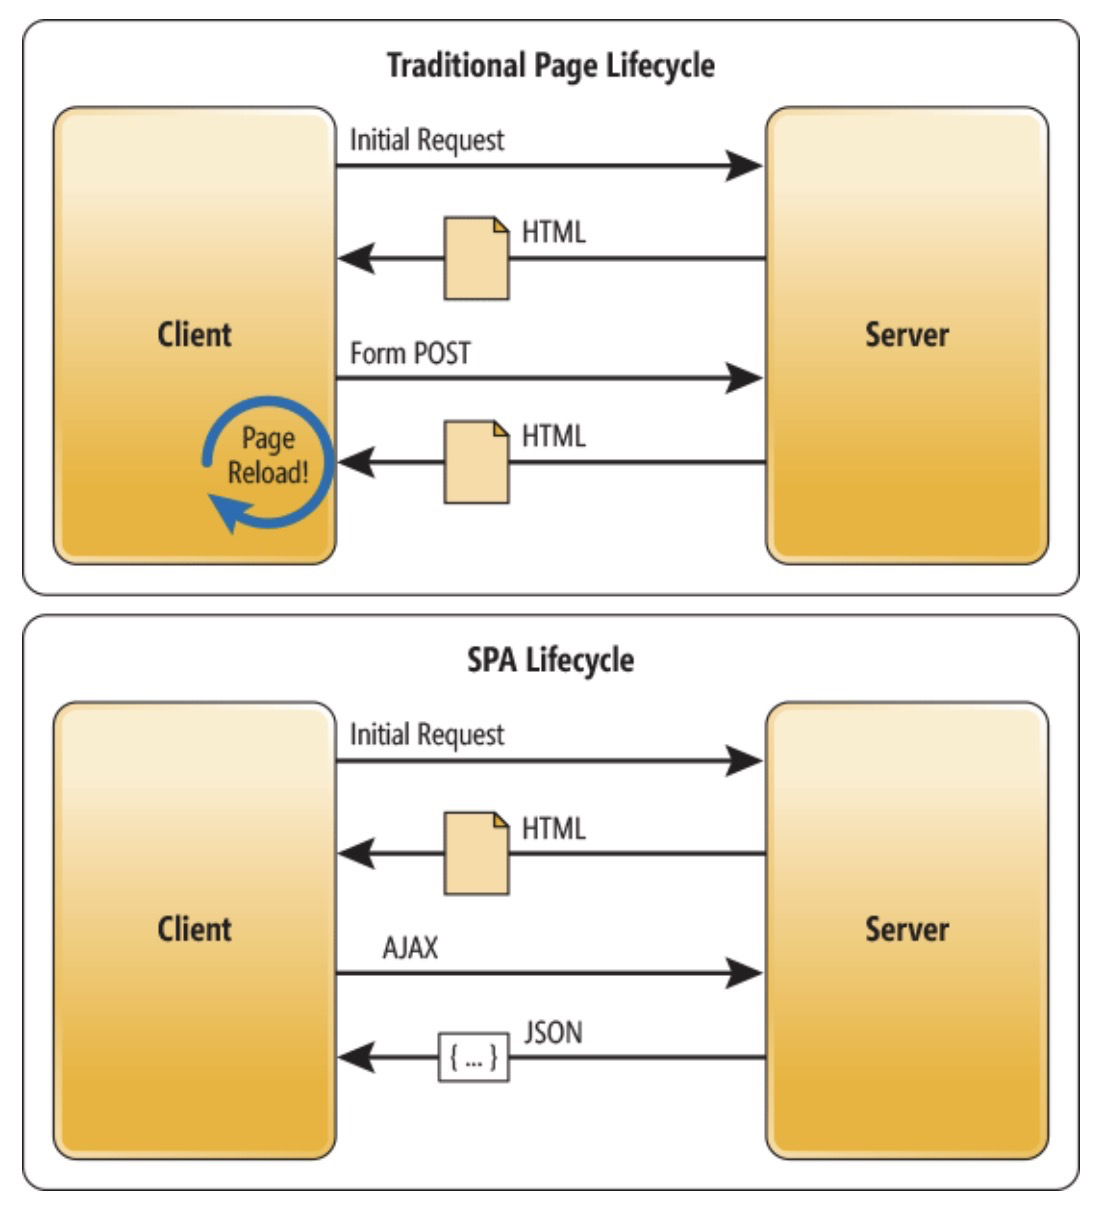


http://example.webscraping.com/places/default/search

이제는 위가 아닌 아래의 방법을 따를 것 이다. 

form 태그를 찾아야하는데, 여기는 액션(method)이 없음

In [1]:
import requests

headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537'}


def getDownload(url, param = None, retries = 3):
    resp = None
    try:
        resp = requests.get(url, params = param, headers = headers)
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print('Retries : {0}'.format(retries))
            return getDownload(url, param, retries -1)
        else:
            print(resp.status_code)
            print(resp.reason)
            print(resp.request.headers)
            
    return resp

In [62]:
# Post 방식으로 보낼 것 
url ='http://example.webscraping.com/places/default/search'
param = {'search_term':'korea'}

html = getDownload(url,param)
# html.text
# 결과 안나옴, 뒤에서 비동기적으로 돌고 있는 것. 

In [70]:
# 새로운 url  / network를 통해 찾아옴 
# http://example.webscraping.com/places/ajax/search.json?&search_term=korea&page_size=10&page=0
url = 'http://example.webscraping.com/places/ajax/search.json'
param ={'search_term':'korea',
        'page_size':10,
        'page':0}

html = getDownload(url, param)

import json

result = json.loads(html.text)
result['records'][0]['country']
result
# html.request.headers  확인해서 원래 바꿔줘야함 

{'error': '',
 'num_pages': 1,
 'records': [{'country': 'North Korea',
   'id': 3817965,
   'pretty_link': '<div><a href="/places/default/view/North-Korea-165"><img src="/places/static/images/flags/kp.png" /> North Korea</a></div>'},
  {'country': 'South Korea',
   'id': 3818011,
   'pretty_link': '<div><a href="/places/default/view/South-Korea-211"><img src="/places/static/images/flags/kr.png" /> South Korea</a></div>'}]}

# Selenium

자동화가 원래 목적, 브라우저를 띄우는 크롤러 중에 가장 강력

In [7]:
!pip install selenium

In [2]:
from selenium import webdriver

In [47]:
# 깔려있는 브라우저 택해야함 / 경로 적어주기
# 창이 등장함 이는 드라이버!
driver = webdriver.Chrome(executable_path='/Users/charming/Python/3. Koipa AI Learning/NLP/chromedriver')

In [40]:
# 사이트 이동시키기
driver.get('http://example.webscraping.com/places/default/search')

In [50]:
# 자동으로 korea라고 입력함.
driver.find_element_by_id('search_term').clear()
driver.find_element_by_id('search_term').send_keys('korea')
driver.find_element_by_id('search').click()

In [56]:
# 결과가 HTML 형태로 나와있음
# BeautifulSoup으로 가져오면 됨
# driver.page_source 확인
results = driver.find_element_by_id('results')
# 결과 가져오기 a태그
results.find_elements_by_tag_name('a')  # s가 붙어야 여러 개 가져옴. 그냥이면 딱 하나 가져옴

[<selenium.webdriver.remote.webelement.WebElement (session="6f5aaa1047da3ac20ca09752bec4964f", element="0.48130793324083654-4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6f5aaa1047da3ac20ca09752bec4964f", element="0.48130793324083654-5")>]

In [63]:
# 함수 쓰기

for tag in results.find_elements_by_tag_name('a'):
    print(tag.text)
    print(tag.get_attribute('href'))   # 속성 가져오기.

North Korea
http://example.webscraping.com/places/default/view/North-Korea-165
South Korea
http://example.webscraping.com/places/default/view/South-Korea-211


In [64]:
# CSS 사용

results = results.find_elements_by_css_selector('#results a')
for tag in results:
    print(tag.text)
    print(tag.get_attribute('href'))  

North Korea
http://example.webscraping.com/places/default/view/North-Korea-165
South Korea
http://example.webscraping.com/places/default/view/South-Korea-211


# xpath로 xml tree 탐색하기

. -> 현재 위치 \

// -> 자손 

/ -> 자식

[@어트리뷰트='값']



In [67]:
div = driver.find_element_by_xpath("//div[@id='results']")
div.text

'North Korea\nSouth Korea'

In [68]:
len(driver.find_elements_by_xpath("//div[@id='results']//a"))

2

In [69]:
# xpath 쓰기

for tag in driver.find_elements_by_xpath("//div[@id='results']//a"):
    print(tag.text)
    print(tag.get_attribute('href'))

North Korea
http://example.webscraping.com/places/default/view/North-Korea-165
South Korea
http://example.webscraping.com/places/default/view/South-Korea-211


In [78]:
import re

re.findall('r"<a href="(.+)" > ', result['records'][0]['pretty_link'])     # pattern, string 필요
# <a href="(.+)" > #

[]

In [88]:
for tag in result['records']:
    print(tag['pretty_link'])
    print(re.findall(r"<a href=\"(.+)\">", tag['pretty_link']))   # r은 new line을 무시한다. 
    print(re.findall(r"<div(.+)</div>", tag['pretty_link']))

<div><a href="/places/default/view/North-Korea-165"><img src="/places/static/images/flags/kp.png" /> North Korea</a></div>
['/places/default/view/North-Korea-165']
['><a href="/places/default/view/North-Korea-165"><img src="/places/static/images/flags/kp.png" /> North Korea</a>']
<div><a href="/places/default/view/South-Korea-211"><img src="/places/static/images/flags/kr.png" /> South Korea</a></div>
['/places/default/view/South-Korea-211']
['><a href="/places/default/view/South-Korea-211"><img src="/places/static/images/flags/kr.png" /> South Korea</a>']


# NAVER email login

In [ ]:
# 아이디는 비공개! json 파일을 딕셔너리 형태로 작성하면 된다. 

# %%writefile ~~.json
# {
    
# }

In [204]:
with open("account.json") as f:
    account = json.load(f)

In [205]:
driver.get('https://nid.naver.com/nidlogin.login?mode=form')

In [118]:
driver.find_element_by_id("id").send_keys(account["id"])
driver.find_element_by_id("pw").send_keys(account["pw"])

In [208]:
# 초기화 
driver.find_element_by_id("id").clear()
driver.find_element_by_id("pw").clear()

In [209]:
# name
driver.find_element_by_name("id").send_keys(account['id'])

In [210]:
# pw
driver.find_element_by_id("pw").send_keys(account["pw"])

In [211]:
# 버튼 누르기

In [212]:
driver.find_element_by_class_name("btn_global").click()
# driver.find_element_by_css_selector(".btn_global").click()
# driver.find_element_by_xpath("//input[class='btn_global']").click()

In [213]:
driver.get("http://mail.naver.com/")
# 바로 스팸메일함 가도 됨
driver.get('https://mail.naver.com/?n=1552462013012&v=f#%7B%22fClass%22%3A%22list%22%2C%22oParameter%22%3A%7B%22page%22%3A1%2C%22sortField%22%3A1%2C%22sortType%22%3A0%2C%22folderSN%22%3A%225%22%2C%22type%22%3A%22%22%2C%22isUnread%22%3Afalse%7D%7D')

In [214]:
# 내 스펨메일 갯수
len(driver.find_elements_by_css_selector('strong.mail_title'))

8

In [215]:
for tag in driver.find_elements_by_css_selector('strong.mail_title'):
    print(tag.text)

[왓챠플레이] 박찬욱 감독 첫 드라마 <리틀 드러머 걸: 감독판> 특별 시사회에 초대합니다 😘
(제목없음)
[무료창업설명회] 자신에게 맞는 아이템을 찾아보세요.
(광고) 가입한 보험이 너무 많다면 보험정리를 받아보세요 보험료가 줄어듭니다
(제목없음)
(제목없음)
[뉴스레터]초기 스타트업 대표님들께 드리는 조언
(광고) 소비자추천! TOP이사 서비스 KB이사^^


In [163]:
# 쿠키로 자동로그인

session = requests.Session()
# session.cookies.set()
# session.request()

In [149]:
type(driver.get_cookies())

list

In [153]:
for c in driver.get_cookies():
    print(c['name'], c['value'])
    session.cookies.set(c['name'], c['value'])
    # set으로 다 밀어넣으면됨

NMUSER Y9YmFAEwaqbsFAKrKA2w+Hi9p69CWov9KxUsKxE9KotrKxvmKqn9KxUmaqgsaqRJaw/wFxRpad/syqvstoRpadUstonstoRVaqROW9e7EoRVadUsawlGW430DVdq74lR74lC+4kZ74FTWLm/axgmar05pzk/7xKRbrkoWrlvMBil74lR74lC+4kZ74FTWLm/axgmam==
NNB IIMIEI2UVSEFY
NID_JKL HI2DKex2+Ni0rD+bPxmxDzBnVvSqViswVXJi+pJ2Alo=
nid_inf 1799820674
npic V4nM/Y5EJtyeWEtivcCoaJC1UtZGIZ1S9UxgYnuymFnqaqCtuwIkU9r5hfBTDgajCA==
NID_SES AAABidq98utkuvpOGFnVpKznjt1YJ9RQYqt9qqNDPvRs8mAxp4cddl0+rm34rhVsUibQ6USYdA5BfXnQrciXWg3UUFfJHMreEdJjR8WlEuu0WPxWT7Z78bGB7xcWqiuw3bW60EwLFy+FXV2PtERdkC8fVBsn0KP19+RyYnK9Y0O81RF18vJ/18po01JCXyxYCgeD8PbK2AE4yl+PJSOoj3ZLjsc8JKeLcsIMnbaEe/4dV/gaeMeCgaAa06pOjwD5O6LhcDhKnS+bSnKNkQ6tz/rifqzritjuXIRIeGZ1j61jb34fUaWbV6Py5z/H0wqj6F7J0Lx8Gh7PLnzlZloVd5Wj6iq+2fhFcJZhWu51ssXk+k4hXIj2FOZ4HnJUHP/AbyYQ3jhdJG3cMBWI+bDIjeWw3ms8zBJtASHAae4WuKQQ8oss9XrD5NMLDeHZpeq6OsVlYhmgqualsr7ng+DOD7IoP/XsbQvONDMaJD7DY7tCeSg3S2BoHRURGuNv3LZh0EoN1rVwlEMT0Y5pszmLypfWUOs=
NID_AUT Cgvs2FbcN5XVKMc0pHrsXQwnVFPY4OHY/pCFPB1j7hf14E7KhBlR1rCWcldiikkQ


In [154]:
session.cookies.get_dict()

{'NID_AUT': 'Cgvs2FbcN5XVKMc0pHrsXQwnVFPY4OHY/pCFPB1j7hf14E7KhBlR1rCWcldiikkQ',
 'NID_JKL': 'HI2DKex2+Ni0rD+bPxmxDzBnVvSqViswVXJi+pJ2Alo=',
 'NID_SES': 'AAABidq98utkuvpOGFnVpKznjt1YJ9RQYqt9qqNDPvRs8mAxp4cddl0+rm34rhVsUibQ6USYdA5BfXnQrciXWg3UUFfJHMreEdJjR8WlEuu0WPxWT7Z78bGB7xcWqiuw3bW60EwLFy+FXV2PtERdkC8fVBsn0KP19+RyYnK9Y0O81RF18vJ/18po01JCXyxYCgeD8PbK2AE4yl+PJSOoj3ZLjsc8JKeLcsIMnbaEe/4dV/gaeMeCgaAa06pOjwD5O6LhcDhKnS+bSnKNkQ6tz/rifqzritjuXIRIeGZ1j61jb34fUaWbV6Py5z/H0wqj6F7J0Lx8Gh7PLnzlZloVd5Wj6iq+2fhFcJZhWu51ssXk+k4hXIj2FOZ4HnJUHP/AbyYQ3jhdJG3cMBWI+bDIjeWw3ms8zBJtASHAae4WuKQQ8oss9XrD5NMLDeHZpeq6OsVlYhmgqualsr7ng+DOD7IoP/XsbQvONDMaJD7DY7tCeSg3S2BoHRURGuNv3LZh0EoN1rVwlEMT0Y5pszmLypfWUOs=',
 'NMUSER': 'Y9YmFAEwaqbsFAKrKA2w+Hi9p69CWov9KxUsKxE9KotrKxvmKqn9KxUmaqgsaqRJaw/wFxRpad/syqvstoRpadUstonstoRVaqROW9e7EoRVadUsawlGW430DVdq74lR74lC+4kZ74FTWLm/axgmar05pzk/7xKRbrkoWrlvMBil74lR74lC+4kZ74FTWLm/axgmam==',
 'NNB': 'IIMIEI2UVSEFY',
 'nid_inf': '1799820674',
 'npic': 'V4nM/Y5EJtyeWEtivcCoaJC1UtZG

In [157]:
# 쿠키값이 없는 getDownload
html = getDownload("http://mail.naver.com")
# html.text

In [160]:
# 쿠키 이용한 결과 
html = session.get("http://mail.naver.com")
# html.text
# driver.page_source  비교

In [200]:
# 로그아웃하기 ( 창 열어놓고 )

# 화면에 그려진 요소가 없어서 안됨
from selenium.common.exceptions import ElementNotVisibleException
from selenium.webdriver.support.ui import WebDriverWait
# 1초 간격으로 계속 확인하는 것 
# 역슬래쉬는 두 줄로 만듬 

WebDriverWait(driver, 10, 1, ElementNotVisibleException)  \
.until(lambda x:x.find_element_by_id("gnb_logout_button").is_displayed())

driver.find_element_by_id("gnb_logout_button").text  # 로그아웃이라고 뜸
driver.find_element_by_id("gnb_logout_button").click()

# 딜레이를 걸어서 해결해야함.  ( 최대 10초 버튼이 나타날 때 까지! )
# driver.find_element_by_id('gnb_logout_button').get_attribute('href')    # 링크 가져오기

# driver.find_element_by_id('gnb_logout_button').click()

In [199]:
driver.find_element_by_id("gnb_logout_button").is_displayed()

True

In [191]:
# 현재 다루고 있는 페이지 보기 
driver.window_handles

['CDwindow-F4C1E4BBDCE0FA3918448A77819BECFF']

In [193]:
# 다루는 페이지 변경하기 
driver.switch_to_window('CDwindow-F4C1E4BBDCE0FA3918448A77819BECFF')

/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: use driver.switch_to.window instead
  """Entry point for launching an IPython kernel.


# 다음 

다음은 왜 안되는가.

iframe으로 HTML안에 HTML이 있는 형태


In [38]:
driver.get('https://www.daum.net/')

In [39]:
login = driver.find_element_by_id('loginForm')

In [40]:
login.get_attribute('innerHTML')

''

In [41]:
# 안에 새로운 돔이 있는 것 

In [42]:
# frame switch 하기 
driver.switch_to.frame(login)

In [43]:
driver.find_element_by_id('id')

<selenium.webdriver.remote.webelement.WebElement (session="56efdfd3f0643dcf67d37780dab81400", element="0.9821527595902204-1")>

In [44]:
driver.find_element_by_id('id').get_attribute('outerHTML')

'<input type="text" id="id" name="id" class="tf_login" maxlength="50" tabindex="1">'

In [45]:
driver.find_element_by_id('id').send_keys('test')
driver.find_element_by_id('inputPwd').send_keys('test')
# 보내고 원래 DOM으로 돌아와야함
driver.switch_to.default_content()    # 원래 DOM

# 로그인시 새 창이 뜨는 경우

https://www.kt.com/

In [48]:
driver.get('https://www.kt.com/')

In [51]:
driver.find_element_by_css_selector(".quick > a:first-child").get_attribute("outerHTML")
# 로그인 버튼 누르기 
driver.find_element_by_css_selector(".quick > a:first-child").click()

In [52]:
# 관리하는 창이 2개다. 메인 /로그인 

In [54]:
# driver.find_element_by_id("userId").send_keys('test')
# 창이 달라서 안됨
# 현재 열려있는 창 확인 
# 1: 원본 / 2 : 새창 일 것 
driver.window_handles

['CDwindow-013252DFC5B5BB4E370AA6927358C81E',
 'CDwindow-78D65145D4641CEA4FE7546A894B8C1D']

In [55]:
driver.switch_to_window(driver.window_handles[1])

/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: use driver.switch_to.window instead
  """Entry point for launching an IPython kernel.


In [60]:
# 창을 바꾸면 이제 입력이 됨 
driver.find_element_by_id("userId").send_keys('test')
driver.find_element_by_id("password1").send_keys('test')

In [61]:
# 원본으로 돌아가기 
driver.switch_to_window(driver.window_handles[0])

/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: use driver.switch_to.window instead
  """Entry point for launching an IPython kernel.


# Selenium 끝

command + option + i 하면 source 나옴